In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
IMAGE_SIZE = [224, 224]

In [4]:

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable = False

In [6]:
train_directory='/kaggle/input/animal-image-classification-dataset/Training Data/Training Data'
test_directory='/kaggle/input/animal-image-classification-dataset/Testing Data/Testing Data'
val_directory='/kaggle/input/animal-image-classification-dataset/Validation Data/Validation Data'

In [7]:
  # useful for getting number of classes
folders = glob('/kaggle/input/animal-image-classification-dataset/Training Data/Training Data/*')
len(folders)

15

In [8]:

x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode =  'categorical')


Found 30000 images belonging to 15 classes.
Found 2407 images belonging to 15 classes.


In [12]:
print(len(training_set)) # number of batches
print(len(test_set))

938
76


In [13]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/tmp/ipykernel_169/177326590.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
938/938 [==============================] - 777s 810ms/step - loss: 1.0026 - accuracy: 0.7036 - val_loss: 1.0459 - val_accuracy: 0.7146
Epoch 2/10
938/938 [==============================] - 522s 557ms/step - loss: 0.7128 - accuracy: 0.8006 - val_loss: 0.9241 - val_accuracy: 0.7669
Epoch 3/10
938/938 [==============================] - 502s 535ms/step - loss: 0.6348 - accuracy: 0.8225 - val_loss: 1.1233 - val_accuracy: 0.7520
Epoch 4/10
938/938 [==============================] - 499s 532ms/step - loss: 0.5710 - accuracy: 0.8419 - val_loss: 1.0152 - val_accuracy: 0.7707
Epoch 5/10
938/938 [==============================] - 504s 537ms/step - loss: 0.5244 - accuracy: 0.8543 - val_loss: 1.1060 - val_accuracy: 0.7628
Epoch 6/10
938/938 [==============================] - 502s 535ms/step - loss: 0.4929 - accuracy: 0.8663 - val_loss: 1.2120 - val_accuracy: 0.7553
Epoch 7/10
938/938 [==============================] - 500s 533ms/step - loss: 0.4709 - accuracy: 0.8720 - val_loss: 1.2048 -

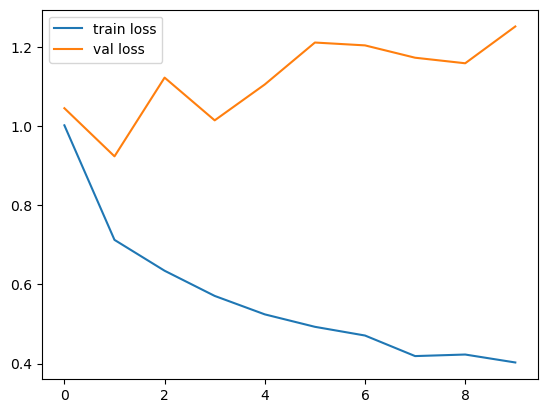

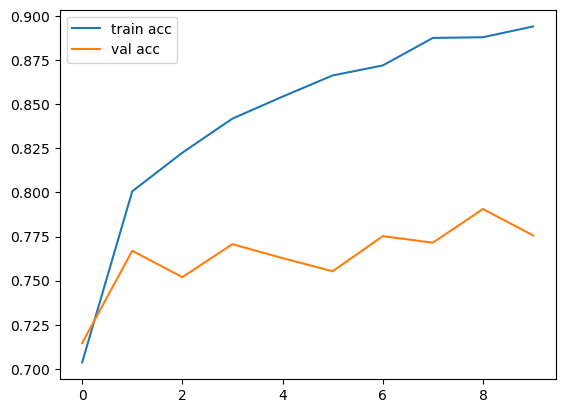

In [15]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [20]:
model.save('BCD.h5')

In [23]:
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img,img_to_array

model1 = load_model('/kaggle/working/BCD.h5',compile=False)  

lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [24]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

1/1 [==============================] - 1s 838ms/step


'Panda'

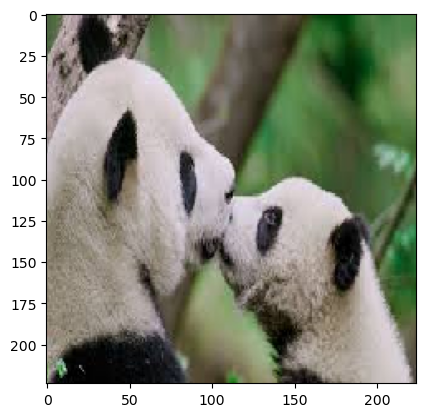

In [25]:
img='/kaggle/input/animal-image-classification-dataset/Testing Data/Testing Data/Panda/Panda-Test (10).jpeg'
pic=load_img('/kaggle/input/animal-image-classification-dataset/Testing Data/Testing Data/Panda/Panda-Test (10).jpeg',target_size=(224,224,3))
plt.imshow(pic)
output(img)